1 | **Importing Libraries and Loading dataset**


1.1 | Names and uses 

Pandas - for data manipulation. It has a n number of data handling functions. 

Numpy is used to create and manage arrays.

Matplotlib - for data visualization. It is also useful for detecting trends in a dataset. 

Seaborn is a Python module for creating statistical visuals. It is built on top of matplotlib and tightly integrates with pandas data structures. Seaborn assists you in exploring and comprehending your data.

Scikit-learn (Sklearn) is Python's most usable and robust machine learning library. It offers a set of efficient tools for machine learning and statistical modeling, such as classification, regression, clustering, and dimensionality reduction, via a Python interface.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor 

# from google.colab import drive
# drive.mount('/content/gdrive')

Loading and reading the data

In [18]:
df = pd.read_csv('MiteResponse.csv')

In [19]:
df.head(10)

,point,ecosystem,area,pyramid,month,pH,humidity,organic_matter,x1.18,x600,...,sp.Uropodina,abundance_mesostigmata,abundance_total,Astigmata,Collembola,Oribatida,Prostigmata,Insecta,Myriapoda,Arachnida
0,1FE-1,patch,exterior,1f,february,4.78,30.356436,51.691554,41.751893,16.230635,...,1.0,12.0,64.0,0.0,2.0,32.0,8.0,8.0,1.0,1.0
1,1FE-2,patch,exterior,1f,april,4.58,76.484000,42.188297,40.325866,19.121973,...,1.0,1.0,11.0,0.0,1.0,6.0,1.0,2.0,0.0,0.0
2,1FE-3,patch,exterior,1f,june,5.26,75.100000,34.939759,44.210054,19.367145,...,0.0,1.0,12.0,0.0,1.0,5.0,0.0,2.0,0.0,0.0
3,1FE-4,patch,exterior,1f,august,4.12,59.300000,61.393597,64.836820,16.953975,...,2.0,3.0,10.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0
4,1FE-5,patch,exterior,1f,october,3.94,47.000000,35.645472,61.748948,18.025258,...,0.0,0.0,8.0,1.0,1.0,1.0,0.0,5.0,0.0,0.0
5,1FE-6,patch,exterior,1f,december,3.51,50.300000,40.199123,60.230548,14.729427,...,1.0,5.0,29.0,0.0,11.0,5.0,1.0,7.0,0.0,0.0
6,1FI-1,patch,interior,1f,february,4.56,35.137450,96.224693,39.742805,19.228414,...,3.0,24.0,187.0,15.0,3.0,114.0,0.0,26.0,1.0,0.0
7,1FI-2,patch,interior,1f,april,4.50,75.478000,38.989479,47.877180,18.745262,...,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
8,1FI-3,patch,interior,1f,june,4.75,76.600000,53.846154,50.136417,20.266562,...,1.0,27.0,198.0,3.0,77.0,76.0,2.0,9.0,0.0,2.0
9,1FI-4,patch,interior,1f,august,4.43,51.700000,44.703390,47.052825,19.824597,...,0.0,2.0,12.0,1.0,2.0,4.0,0.0,3.0,0.0,0.0


In [20]:
df['ecosystem'].value_counts()

ecosystem
patch      108
pasture    108
Name: count, dtype: int64

In [21]:
df['month'].value_counts()

month
february    36
april       36
june        36
august      36
october     36
december    36
Name: count, dtype: int64

In [22]:
print("Shape of the dataframe: ",df.shape)
df.isna().sum()

Shape of the dataframe:  (216, 25)


point                     0
ecosystem                 0
area                      0
pyramid                   0
month                     0
pH                        1
humidity                  1
organic_matter            1
x1.18                     1
x600                      1
x300                      1
x53                       1
x53m                      1
temperature               1
sp.Gamasina               4
sp.Uropodina              4
abundance_mesostigmata    4
abundance_total           1
Astigmata                 1
Collembola                1
Oribatida                 1
Prostigmata               1
Insecta                   1
Myriapoda                 1
Arachnida                 1
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   point                   216 non-null    object 
 1   ecosystem               216 non-null    object 
 2   area                    216 non-null    object 
 3   pyramid                 216 non-null    object 
 4   month                   216 non-null    object 
 5   pH                      215 non-null    float64
 6   humidity                215 non-null    float64
 7   organic_matter          215 non-null    float64
 8   x1.18                   215 non-null    float64
 9   x600                    215 non-null    float64
 10  x300                    215 non-null    float64
 11  x53                     215 non-null    float64
 12  x53m                    215 non-null    float64
 13  temperature             215 non-null    float64
 14  sp.Gamasina             212 non-null    fl

Omitting Null Values

In [24]:
df.isnull().sum()

point                     0
ecosystem                 0
area                      0
pyramid                   0
month                     0
pH                        1
humidity                  1
organic_matter            1
x1.18                     1
x600                      1
x300                      1
x53                       1
x53m                      1
temperature               1
sp.Gamasina               4
sp.Uropodina              4
abundance_mesostigmata    4
abundance_total           1
Astigmata                 1
Collembola                1
Oribatida                 1
Prostigmata               1
Insecta                   1
Myriapoda                 1
Arachnida                 1
dtype: int64

In [25]:
df.dropna(inplace = True)
df.isnull().sum() 
# the change made here is inplace that would make changes permanent without assigning.

point                     0
ecosystem                 0
area                      0
pyramid                   0
month                     0
pH                        0
humidity                  0
organic_matter            0
x1.18                     0
x600                      0
x300                      0
x53                       0
x53m                      0
temperature               0
sp.Gamasina               0
sp.Uropodina              0
abundance_mesostigmata    0
abundance_total           0
Astigmata                 0
Collembola                0
Oribatida                 0
Prostigmata               0
Insecta                   0
Myriapoda                 0
Arachnida                 0
dtype: int64

2 | 🎯📊EDA-Exploratory data analysis📈📉
2.1 | Data distribution

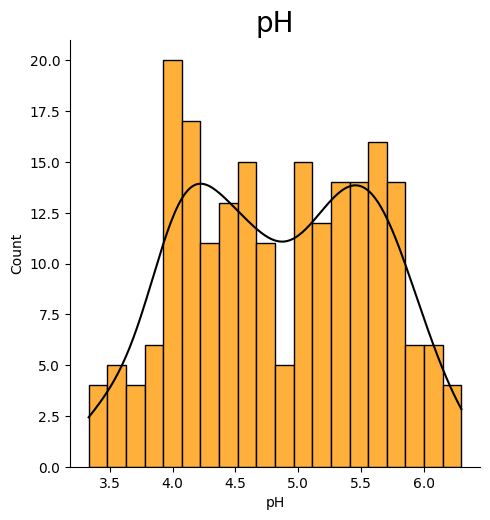

In [26]:
sns.displot(x=df['pH'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("pH",size=20)
plt.show()

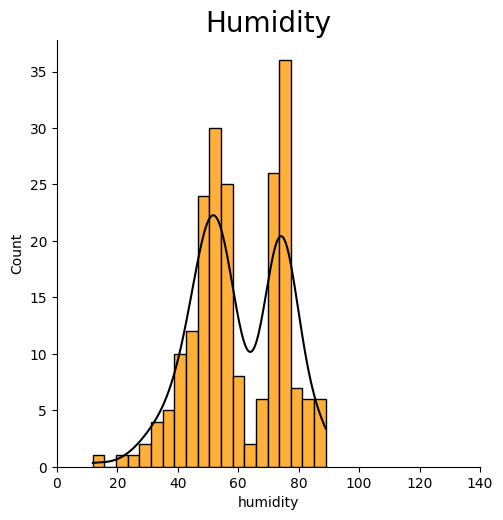

In [27]:
sns.displot(x=df['humidity'],bins=20,color='black',edgecolor='black',kde=True,facecolor='#ffb03b')
plt.title("Humidity", size=20)
plt.xticks(range(0,150,20))
plt.show()

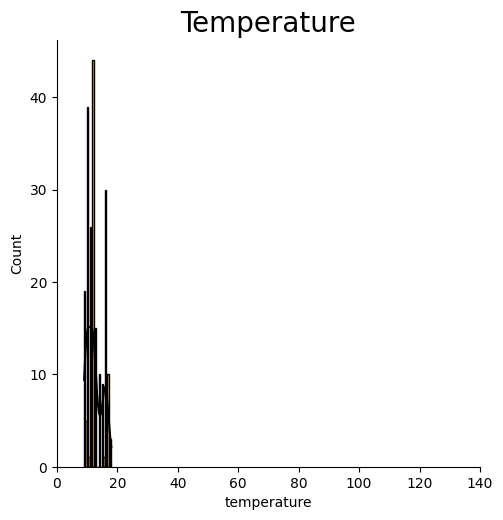

In [28]:
sns.displot(x=df['temperature'],bins=20,color='black',edgecolor='black',kde=True,facecolor='#ffb03b')
plt.title("Temperature", size=20)
plt.xticks(range(0,150,20))
plt.show()

In [29]:
#sns.relplot(x='pH',y='abundance_mesostigmata',data=df,kind='scatter',hue='ecosystem',height=5)
#plt.show()

The abundance of mesostigmata is higher in patch ecosystems, as shown by the plot, since they contain a diverse and unevenly distributed collection of mites. Furthermore, the number of mesostigmata is higher between pH levels 4 and 5.3. As the pH level is less than 7, the acidic pH level is beneficial for the growth of Mesostigmata. 


In [30]:
#sns.relplot(x='temperature',y='abundance_mesostigmata',data=df,kind='scatter',hue='ecosystem',height=5)
#plt.show()

The graph shows that the maximum abundance of mesostigmata occurs between temperatures 9° and 12°, and the optimum abundance occurs between temperatures 13° and 18°.


**2.3 | Outerlier detection using graphs**

In [31]:
# Unique values in the label column

eco = df['ecosystem'].unique()
print(len(eco))
print(eco)
print(pd.value_counts(df['ecosystem']))

2
['patch' 'pasture']
ecosystem
patch      107
pasture    105
Name: count, dtype: int64


In [32]:
# Filtering each unique label and store it in a list df2 for to plot the box plot

df2=[]
for i in eco:
    df2.append(df[df['ecosystem'] == i])
df2[1].head()

,point,ecosystem,area,pyramid,month,pH,humidity,organic_matter,x1.18,x600,...,sp.Uropodina,abundance_mesostigmata,abundance_total,Astigmata,Collembola,Oribatida,Prostigmata,Insecta,Myriapoda,Arachnida
12,1PE-1,pasture,exterior,1p,february,5.71,37.210,2.502554,28.794541,14.571645,...,0.0,0.0,10.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0
13,1PE-2,pasture,exterior,1p,april,5.46,73.483,28.404420,37.606383,20.279255,...,0.0,1.0,20.0,0.0,5.0,7.0,1.0,6.0,0.0,0.0
14,1PE-3,pasture,exterior,1p,june,6.20,72.900,35.055351,41.409315,17.644319,...,0.0,0.0,4.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0
15,1PE-4,pasture,exterior,1p,august,5.42,52.700,29.343629,38.054314,18.752149,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
16,1PE-5,pasture,exterior,1p,october,5.94,51.400,38.738739,41.654135,21.138561,...,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


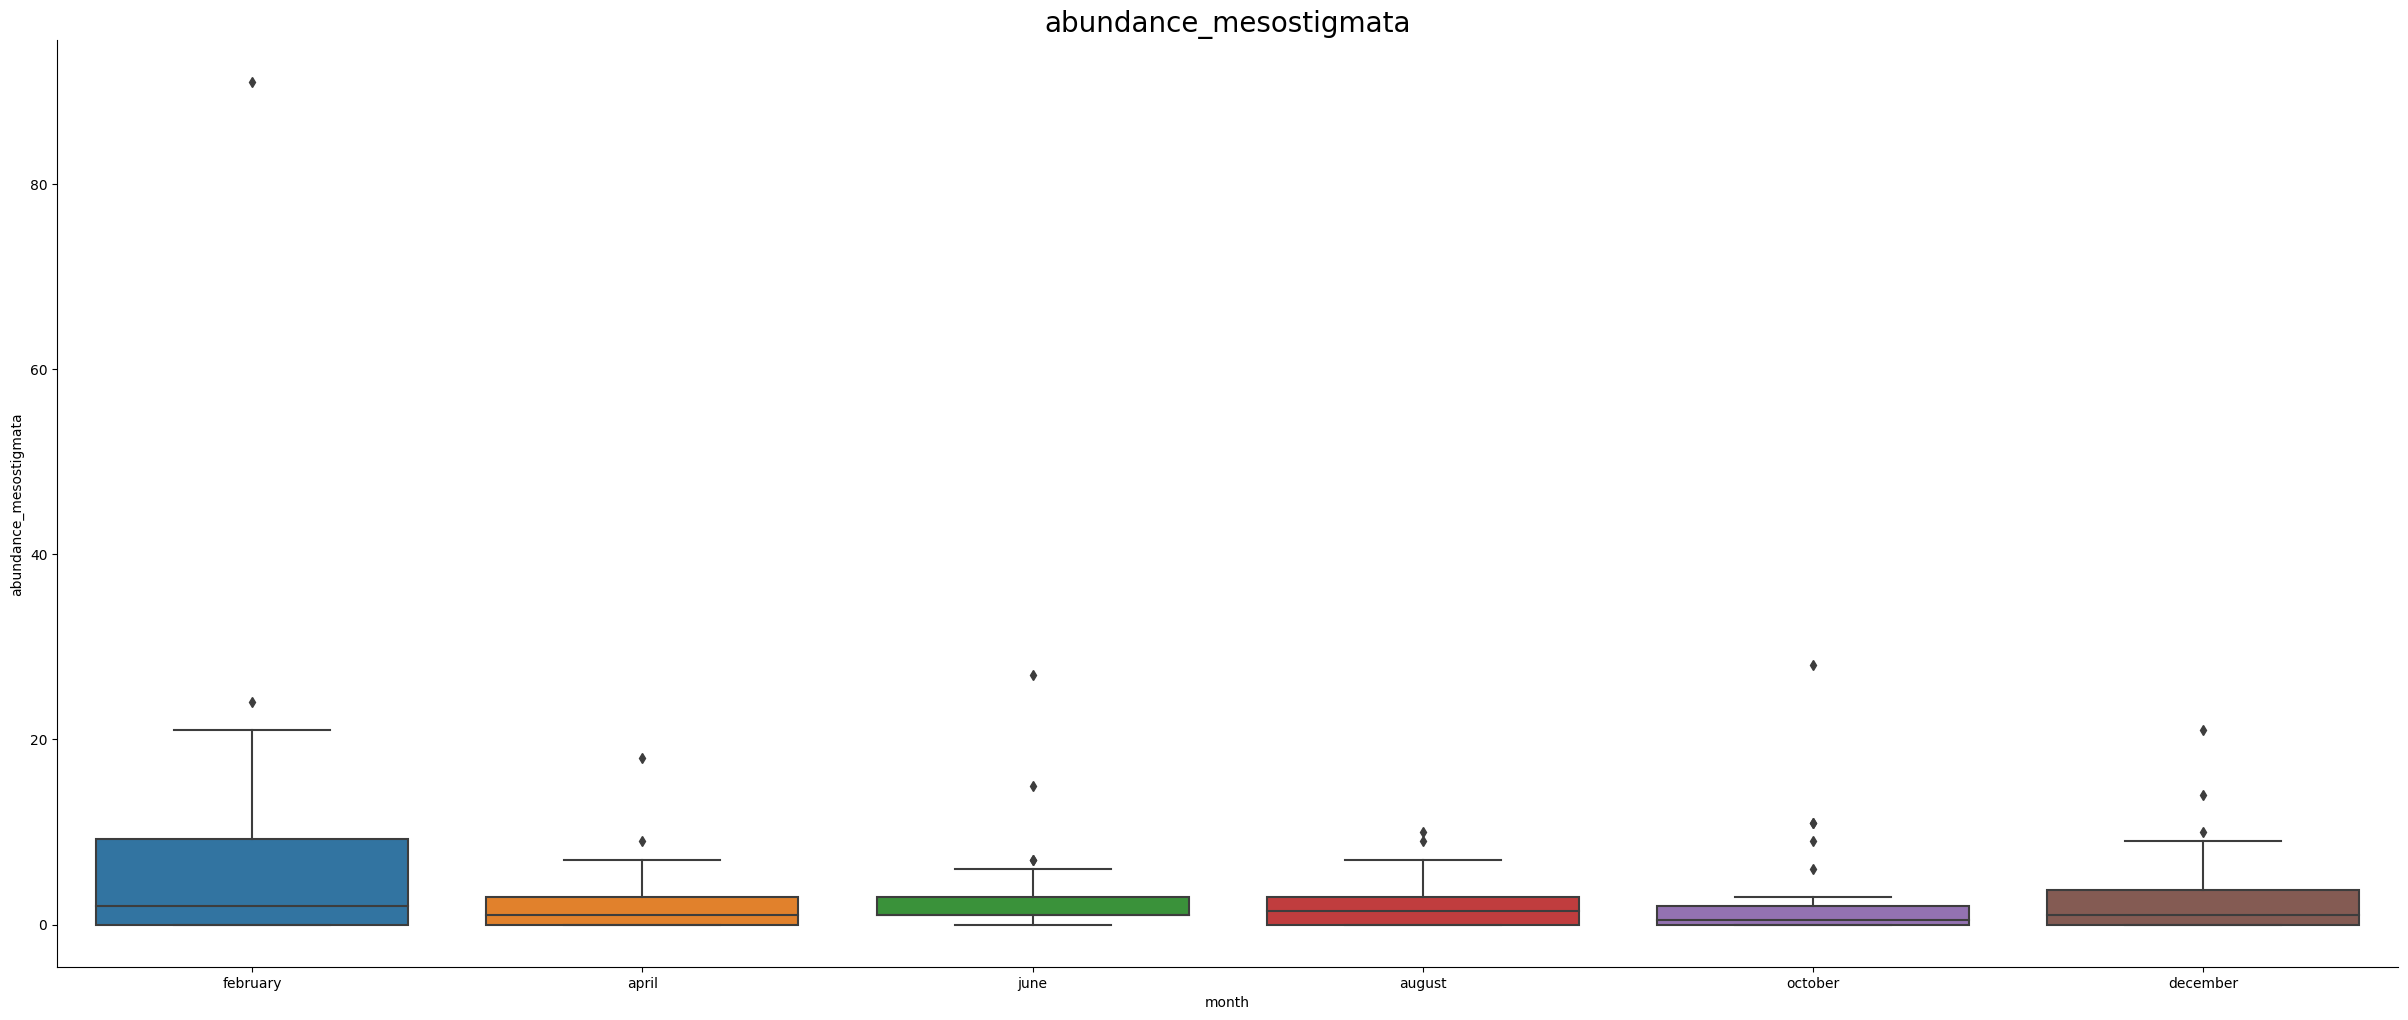

In [33]:
sns.catplot(data=df, x='month', y='abundance_mesostigmata', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("abundance_mesostigmata", size=20)
plt.show()

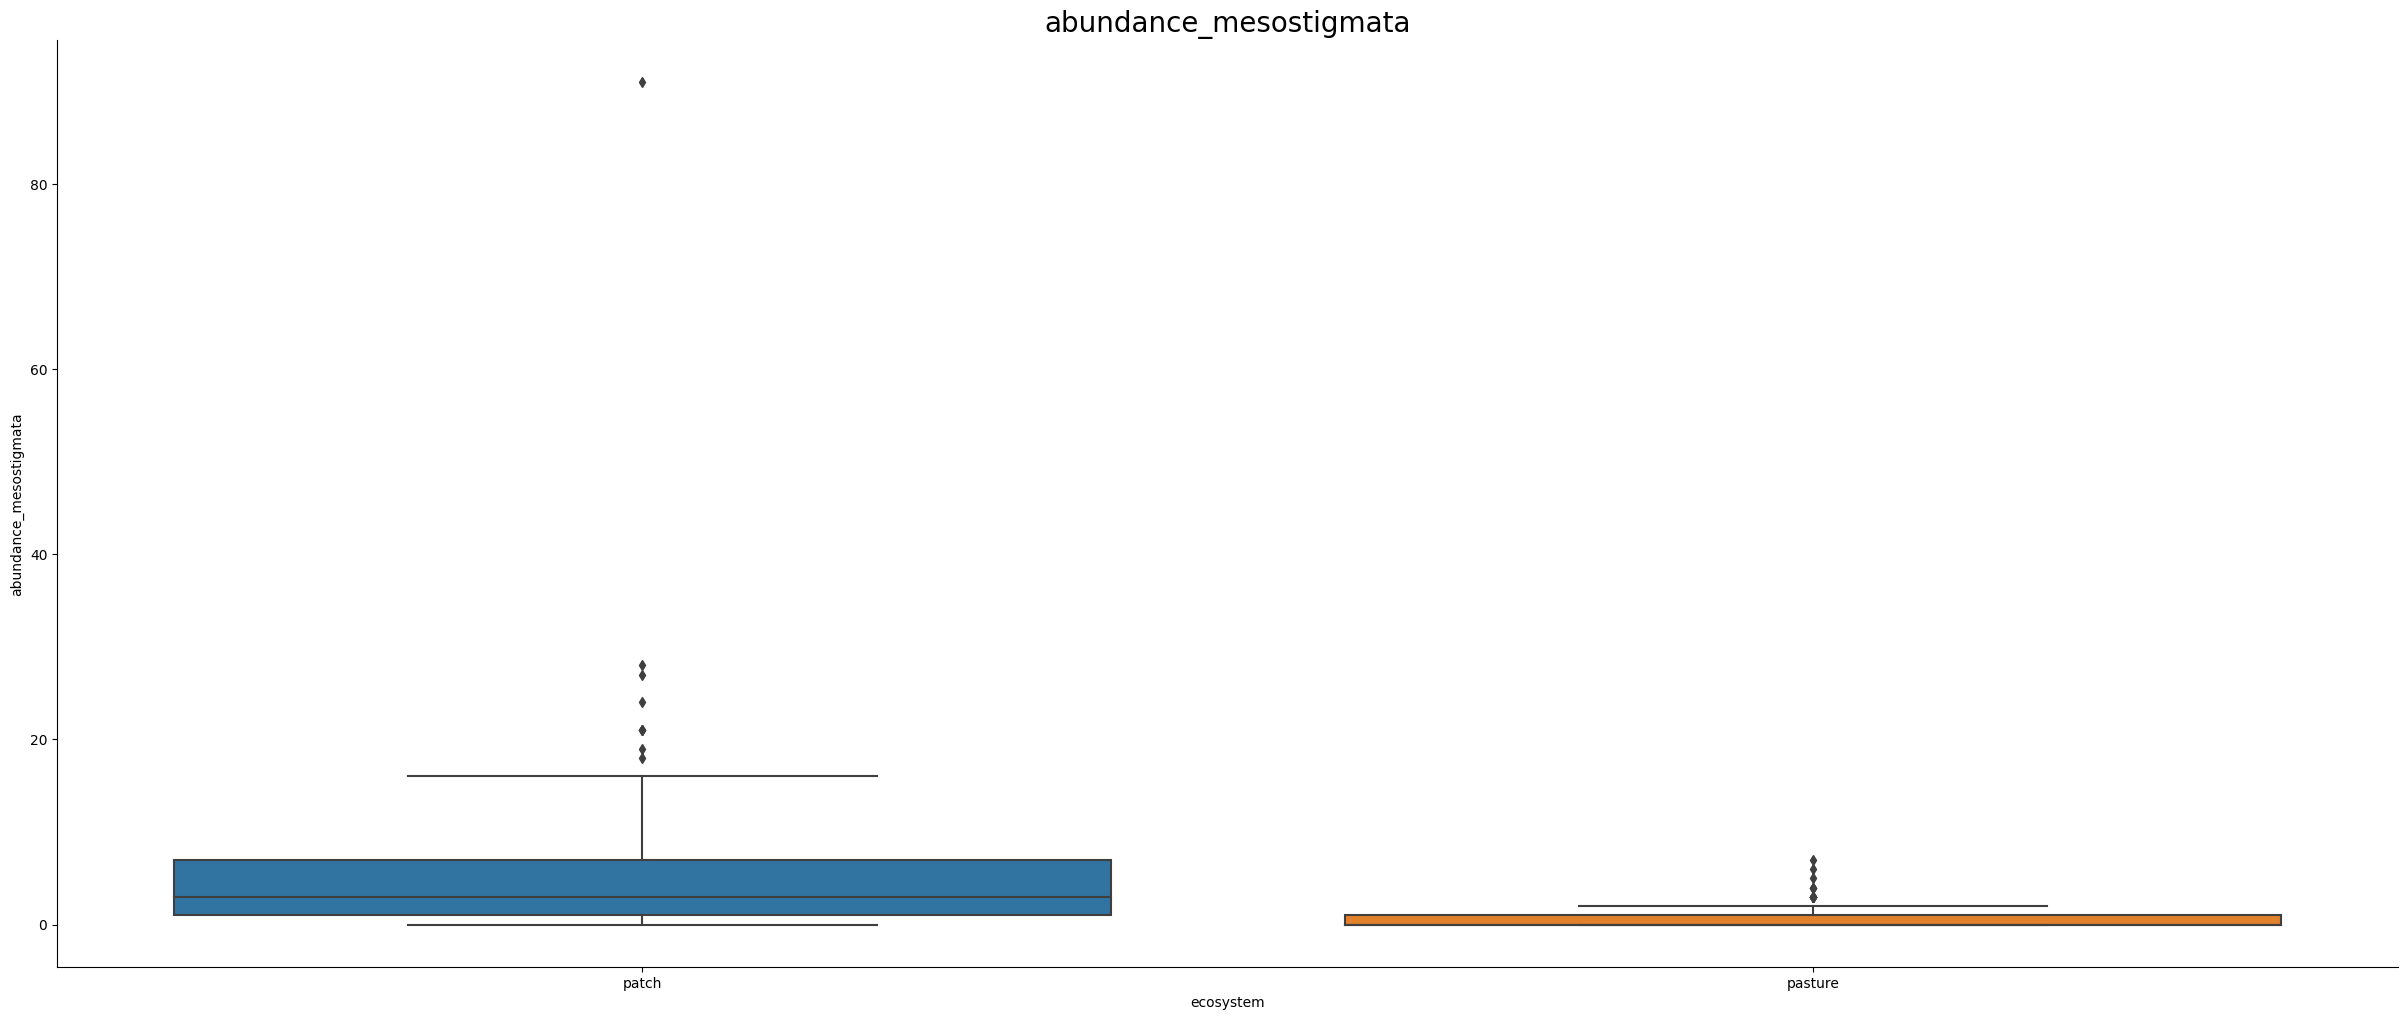

In [34]:
sns.catplot(data=df, x='ecosystem', y='abundance_mesostigmata', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("abundance_mesostigmata", size=20)
plt.show()

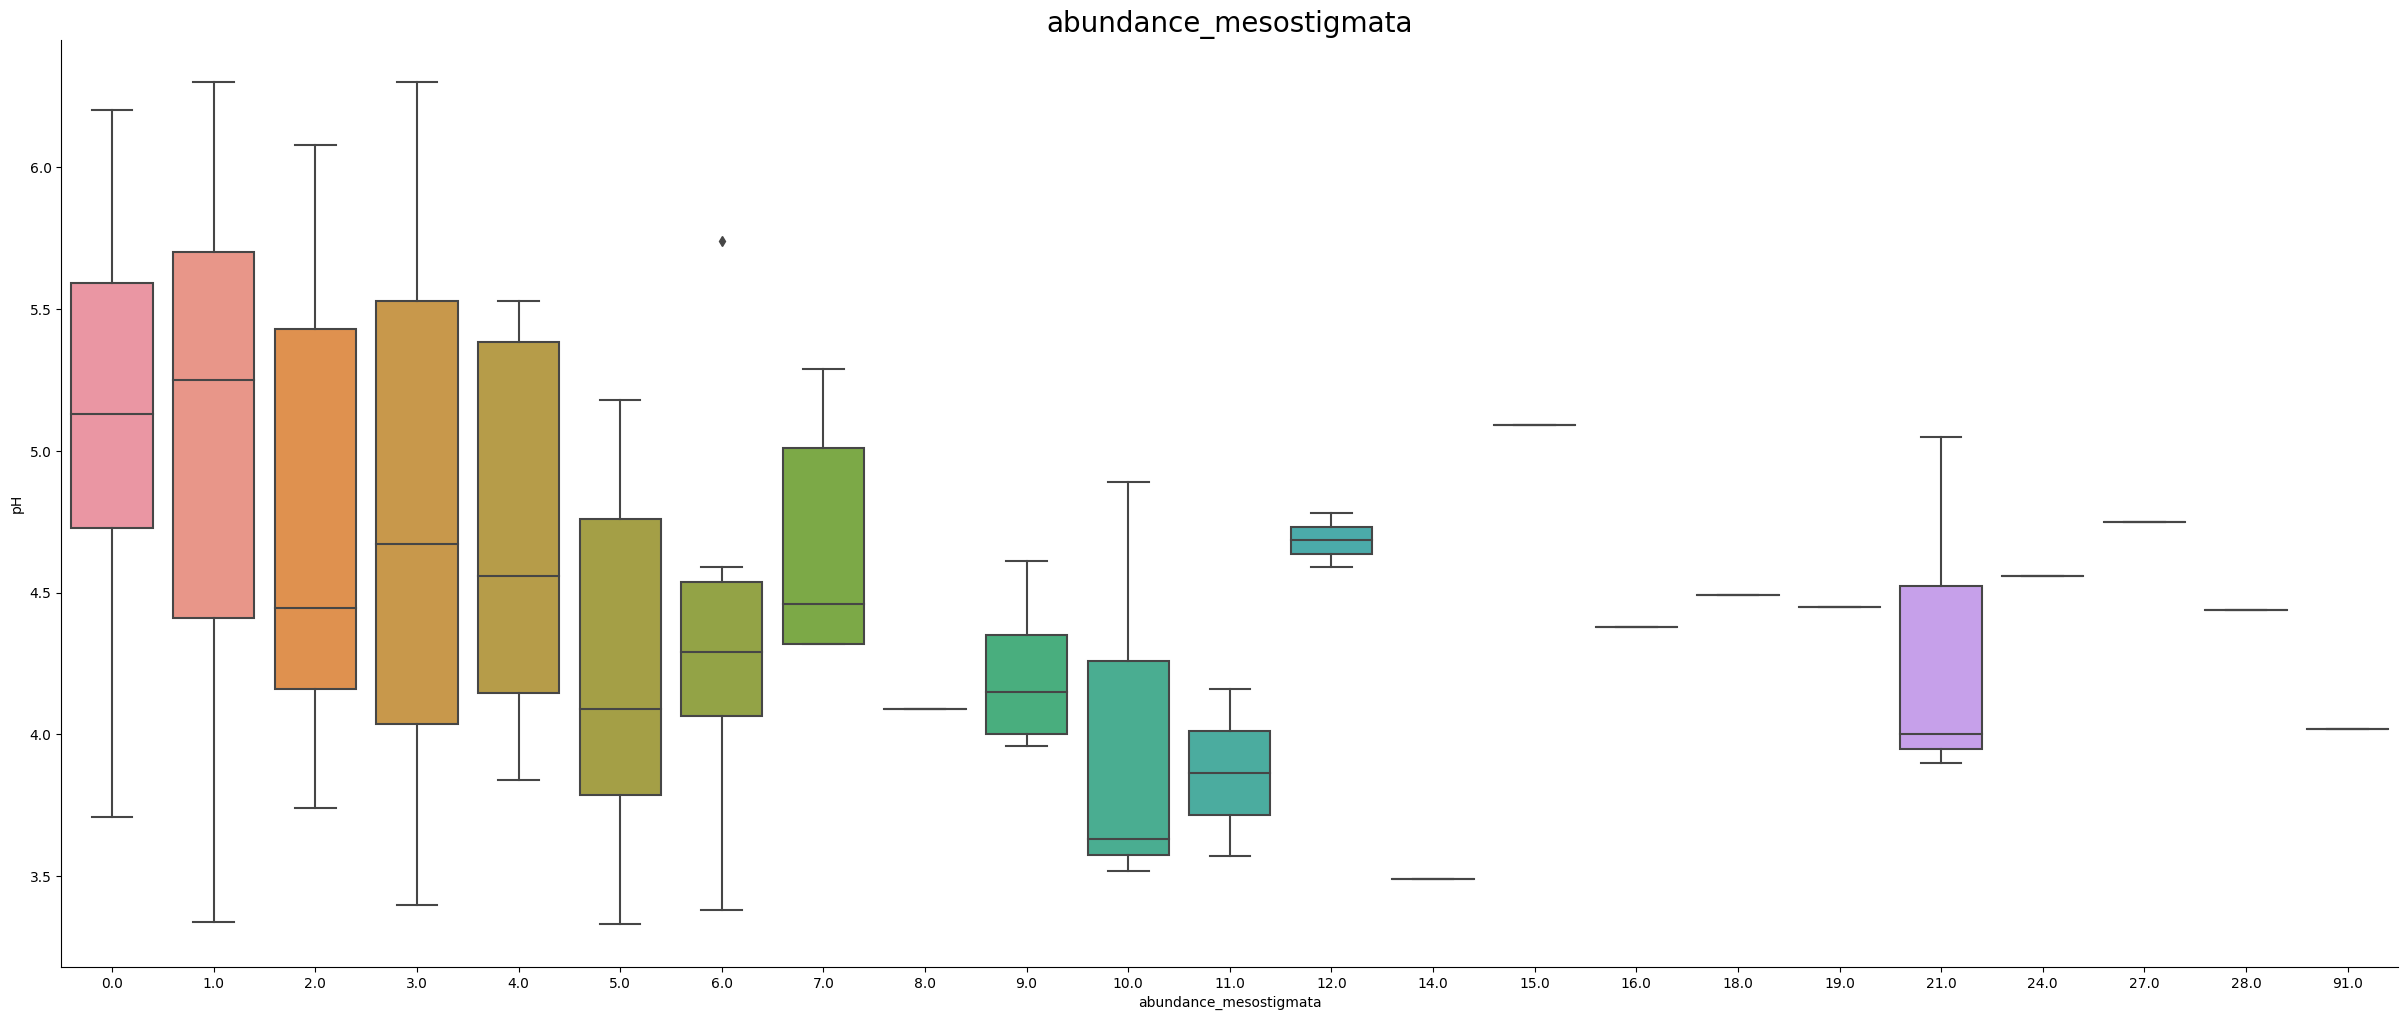

In [35]:
sns.catplot(data=df, x='abundance_mesostigmata', y='pH', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("abundance_mesostigmata", size=20)
plt.show()

These graphs shows that thers are few outliers present in this dataset. Outliers are not much so as to affect the prediction model, therefore we are moving forward without outlier treatment. Sometimes outliers also contain information which can help in modelling.

# Modelling:

In [36]:
# Dropping categorical columns
df.columns
df_m = df.drop(['point','ecosystem','area','pyramid','month'], axis=1)

In [37]:
# creating target variables and independant variables 
y = df_m['abundance_mesostigmata']
X = df_m.drop(['abundance_mesostigmata','abundance_total'], axis=1)

In [38]:
#Splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size =0.25 , random_state =29)

In [39]:
#We used three types of models from scikit 
dt = DecisionTreeRegressor()
ab = AdaBoostRegressor()
rf = RandomForestRegressor()

def fit_n_print(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    print(model,'train',train_score)
    print(model,'test',test_score)
    
fit_n_print(dt,X_train, X_test, y_train, y_test)
fit_n_print(ab,X_train, X_test, y_train, y_test)
fit_n_print(rf,X_train, X_test, y_train, y_test)

DecisionTreeRegressor() train 1.0
DecisionTreeRegressor() test 0.1396270283574479
AdaBoostRegressor() train 0.8925446136977733
AdaBoostRegressor() test 0.3646175407912601
RandomForestRegressor() train 0.9434779288580316
RandomForestRegressor() test 0.341394436850618


In [40]:
# We are just benchmarking at 33% on test and random forest helped us in getting the results. The predictors which have maximum importance are listed below
imp_ft = pd.DataFrame({'features' : X_train.columns, 'Importance': rf.feature_importances_})
imp_ft.sort_values('Importance', ascending = False)

,features,Importance
10,sp.Uropodina,0.393957
13,Oribatida,0.150100
9,sp.Gamasina,0.094240
5,x300,0.059012
4,x600,0.044889
15,Insecta,0.044410
14,Prostigmata,0.039654
0,pH,0.031630
2,organic_matter,0.029538
12,Collembola,0.026605


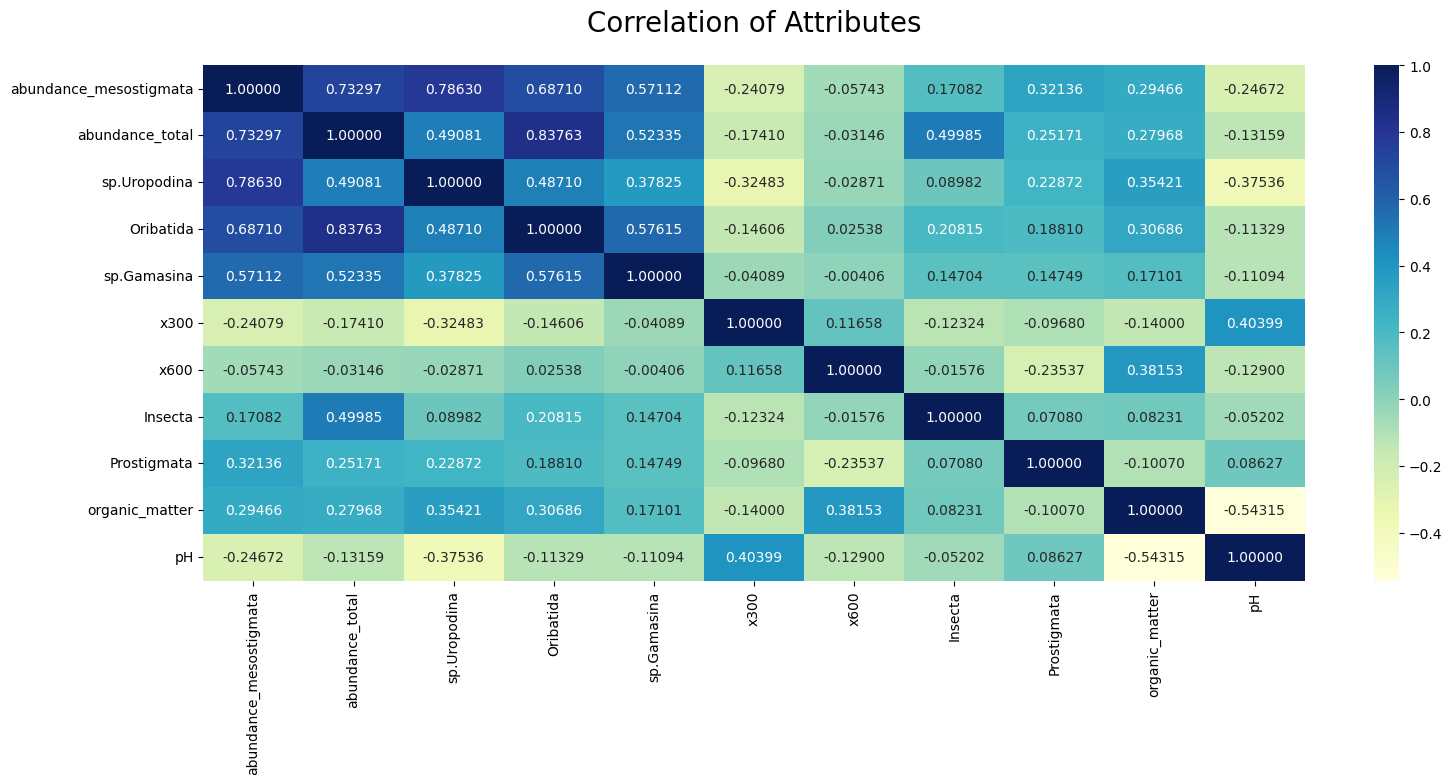

In [41]:
cor_mat = df[['abundance_mesostigmata','abundance_total','sp.Uropodina','Oribatida','sp.Gamasina','x300','x600','Insecta','Prostigmata','organic_matter','pH']]
fig,ax = plt.subplots(figsize = (16,8))
plt.title('Correlation of Attributes', y=1.05, size=20)
sns.heatmap(cor_mat.corr(), cmap='YlGnBu',annot=True, fmt='.5f',ax = ax)
plt.tight_layout()

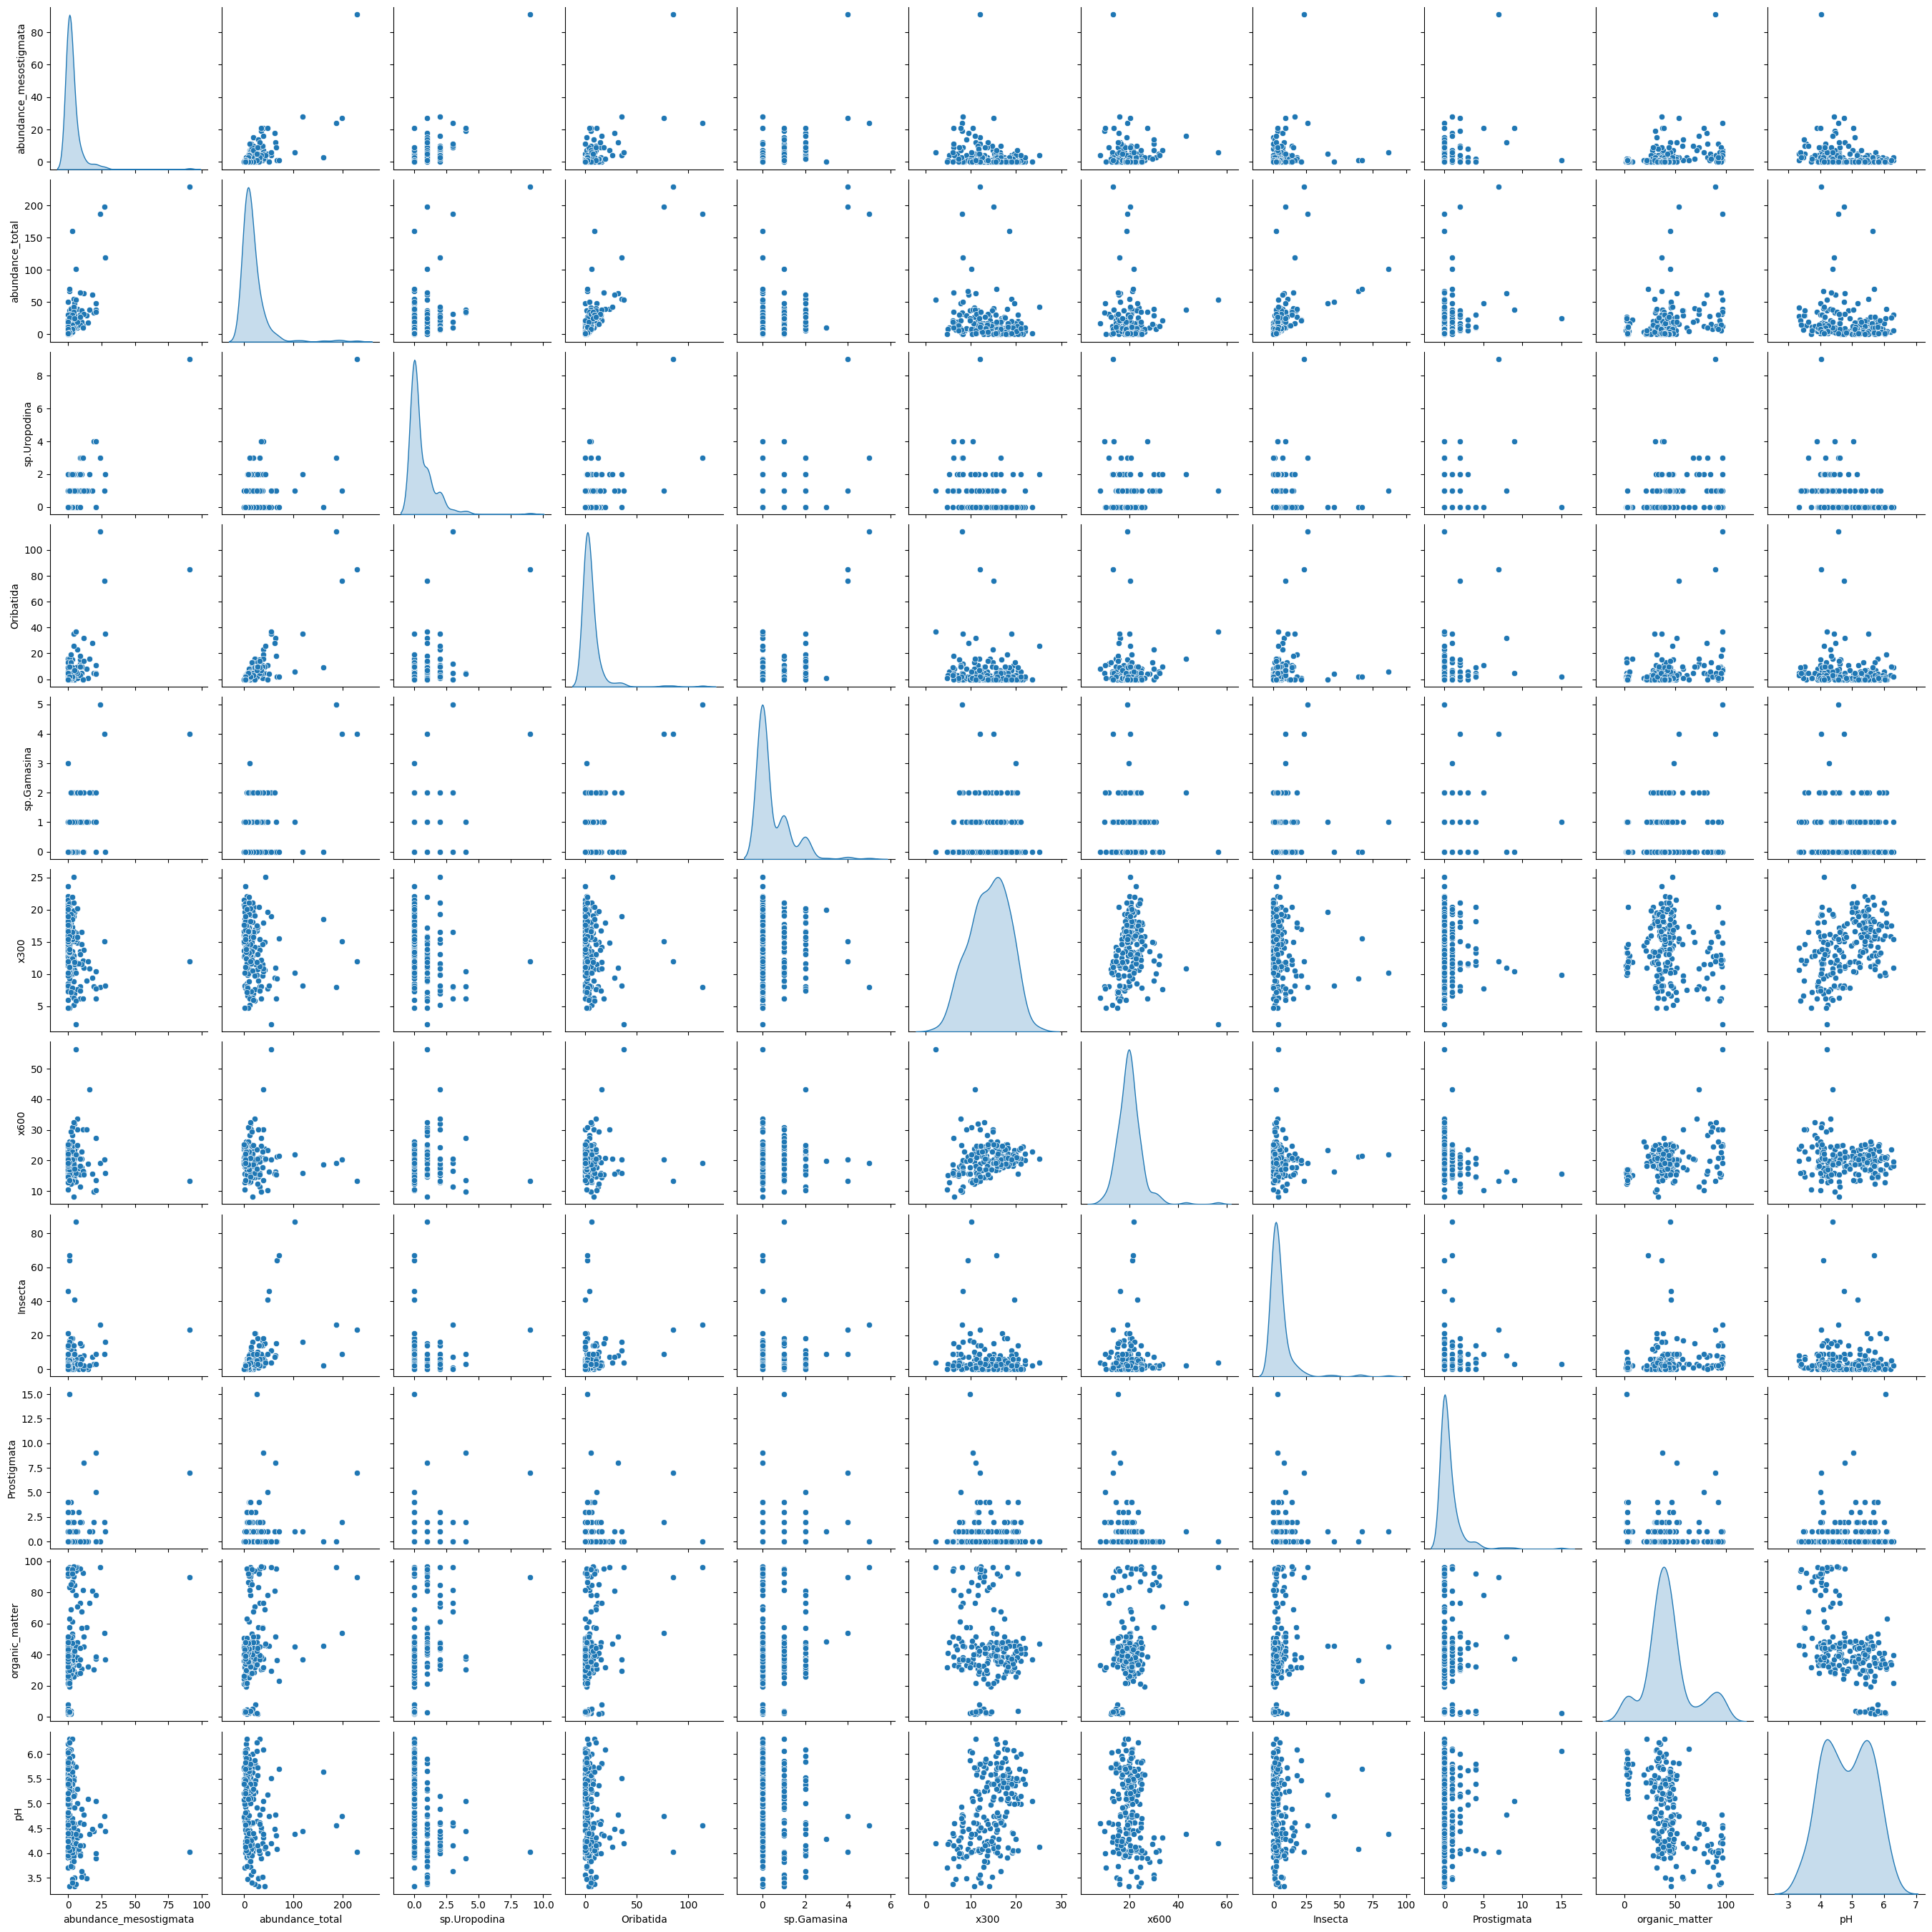

In [42]:
sns.pairplot(data=cor_mat, diag_kind= 'kde')
plt.show()

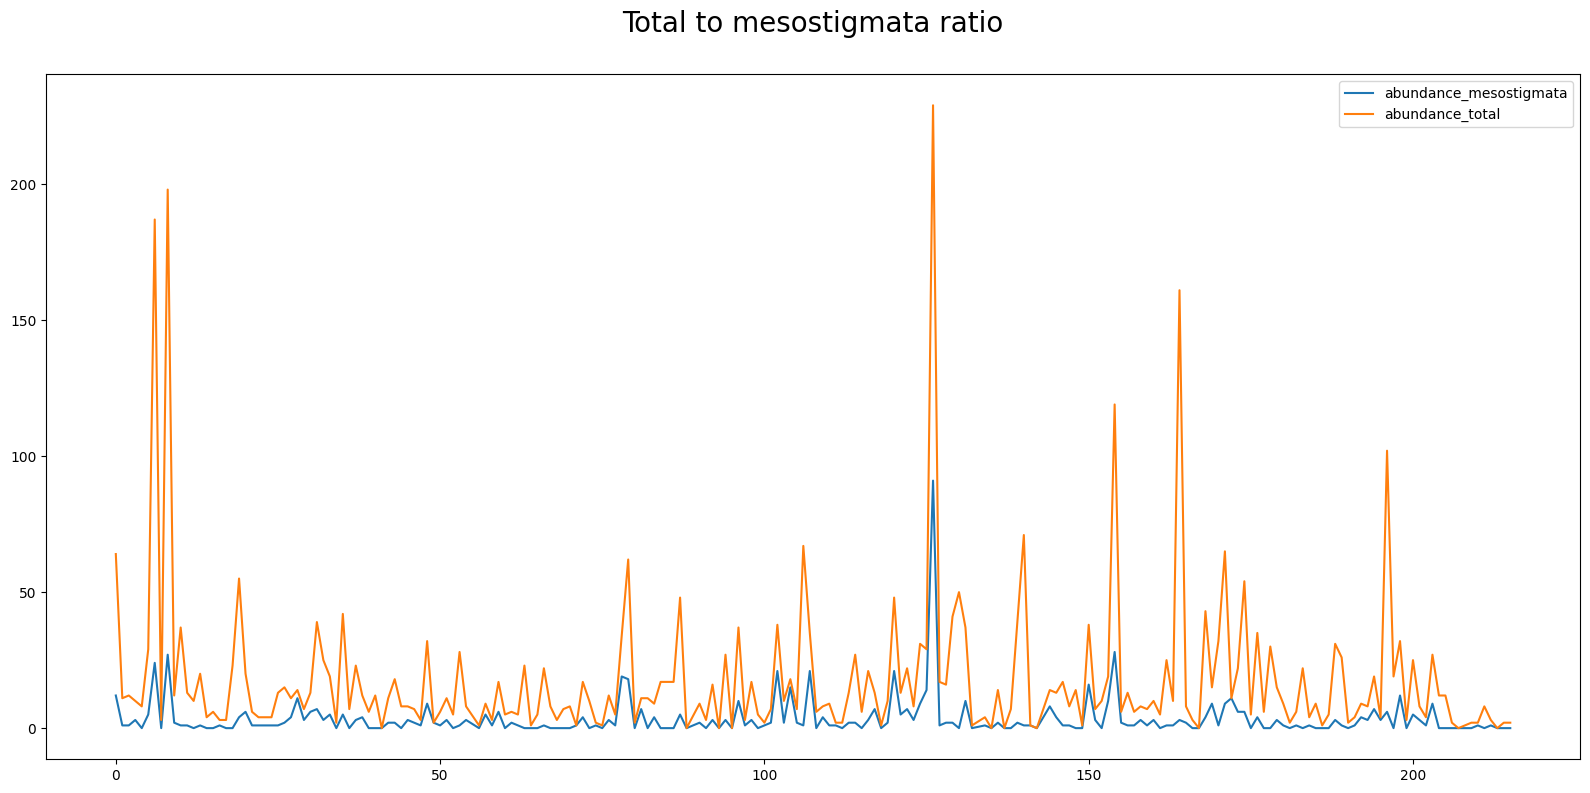

In [43]:
fig,ax = plt.subplots(figsize = (16,8))
plt.title('Total to mesostigmata ratio', y=1.05, size=20)
df[['abundance_mesostigmata','abundance_total']].plot(ax = ax)
plt.tight_layout()